In [1]:
# Import the relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install xgboost
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Load and preview the dataset
df = pd.read_csv("/Users/manan/Downloads/AOT/Module 8/Module8_assignment_dataset.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2]:
# Drop these columns from the dataset
columns_to_drop = ['Street', 'Alley', 'YrSold', 'SaleType']

df_cleaned = df.drop(columns=columns_to_drop)

# Print the remaining columns
print("Remaining Columns:\n", df_cleaned.columns)

Remaining Columns:
 Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
   

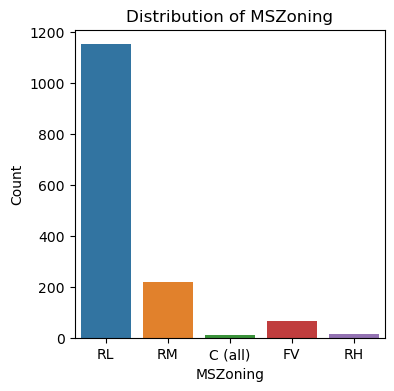

In [3]:
# Bar Chart for MSZoning
plt.figure(figsize=(4, 4))
sns.countplot(data=df_cleaned, x='MSZoning')
plt.title('Distribution of MSZoning')
plt.xlabel('MSZoning')
plt.ylabel('Count')
plt.show()

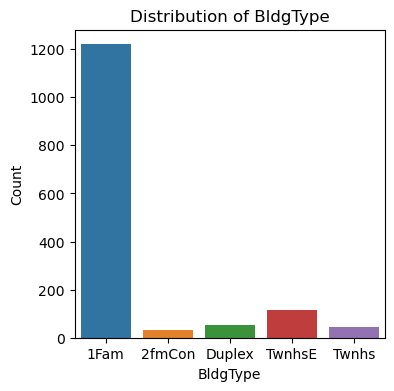

In [4]:
# Bar Chart for BldgType
plt.figure(figsize=(4, 4))
sns.countplot(data=df_cleaned, x='BldgType')
plt.title('Distribution of BldgType')
plt.xlabel('BldgType')
plt.ylabel('Count')
plt.show()

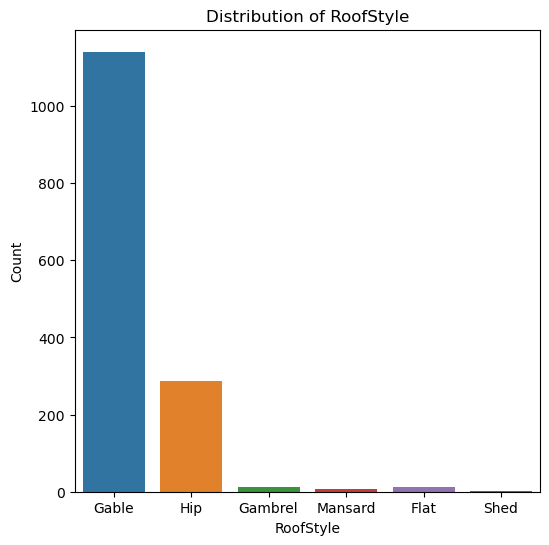

In [5]:
# Bar Chart for RoofStyle
plt.figure(figsize=(6, 6))
sns.countplot(data=df_cleaned, x='RoofStyle')
plt.title('Distribution of RoofStyle')
plt.xlabel('RoofStyle')
plt.ylabel('Count')
plt.show()

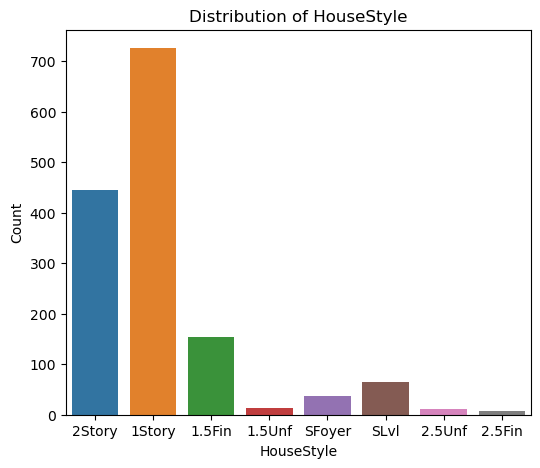

In [6]:
# Bar Chart for HouseStyle
plt.figure(figsize=(6, 5))
sns.countplot(data=df_cleaned, x='HouseStyle')
plt.title('Distribution of HouseStyle')
plt.xlabel('HouseStyle')
plt.ylabel('Count')
plt.show()

In [7]:
# Pie Chart for CentralAir
plt.figure(figsize=(4, 4))

# Plot the pie chart
plt.pie(central_air_counts, labels=central_air_counts.index, autopct='%1.1f%%', colors=['#BFEDD4', '#FFCCCB'])

plt.title('Proportion of CentralAir')
plt.show()

NameError: name 'central_air_counts' is not defined

<Figure size 400x400 with 0 Axes>

In [8]:
# Identify the categorical columns to dummy code
categorical_columns = df_cleaned.select_dtypes(include=['object']).columns

# Apply dummy coding to the above columns
df_cleaned_dummies = pd.get_dummies(df_cleaned, columns=categorical_columns, drop_first=True)

# Display the rows of the transformed dataset
print("Transformed Dataset:\n", df_cleaned_dummies.head())

Transformed Dataset:
    Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  Fence_MnPrv  Fence_MnWw  \
0          2003       196.0         706  ...            0           0   
1          1976         0.0         978  ...            0           0   
2          2002       162.0         486  ...            0           0   
3          1970         0.0         216  ...            0           0   
4          2000       350.0         655  ...            0           0   

   MiscFeature_Othr  MiscFeature_Shed  MiscFeature_TenC  \

In [9]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

# Step 1: Prepare the data
X = df_cleaned_dummies.drop('SalePrice', axis=1) 
y = df_cleaned_dummies['SalePrice'] 

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = XGBRegressor(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate the errors
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Print out the evaluation metrics
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

# The MAE of 17,290 and MSE of 761,312,368 show strong prediction errors. 
# With an R² score of 0.90, it explains 90% of the variance in house prices, showing strong accuracy.

Mean Absolute Error: 17290.366986836474
Mean Squared Error: 761312367.9953783
R² Score: 0.9007457639439082


In [10]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 1: Prepare the data
X = df_cleaned_dummies.drop('SalePrice', axis=1)  # Features
y = df_cleaned_dummies['SalePrice']  # Target variable

# Step 2: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = XGBRegressor(n_estimators=200, learning_rate=0.05, early_stopping_rounds=20, random_state=42)

# Step 4: Train the model
model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)
predictions = model.predict(X_test)

# Step 6: Calculate evaluation metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Step 7: Print out the evaluation metrics
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Absolute Error: 16692.20426209332
Mean Squared Error: 708400439.2466886
R² Score: 0.9076440271102271


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder

# Step 1: Load the dataset
df = pd.read_csv("/Users/manan/Downloads/AOT/Final/Final_project_student_entrepreneur_dataset.csv")

# Step 2: Preprocess the data
# Convert categorical variables (like 'Yes'/'No') into numeric (1/0)
# For example, 'SoloFounder', 'UniversityInCity', 'HasMentor', 'StartedBusiness'
df['SoloFounder'] = df['SoloFounder'].apply(lambda x: 1 if x == 'Yes' else 0)
df['UniversityInCity'] = df['UniversityInCity'].apply(lambda x: 1 if x == 'Yes' else 0)
df['HasMentor'] = df['HasMentor'].apply(lambda x: 1 if x == 'Yes' else 0)
df['StartedBusiness'] = df['StartedBusiness'].apply(lambda x: 1 if x == 'Yes' else 0)

# Convert any other categorical columns to numerical using LabelEncoder (if needed)
label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])
df['major'] = label_encoder.fit_transform(df['major'])

# Step 3: Define features (X) and target (y)
X = df.drop(columns=['id', 'StartedBusiness'])  # Drop 'id' and target column
y = df['StartedBusiness']  # The target is 'StartedBusiness'

# Step 4: Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Initialize and train the XGBoost classifier
model = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Step 6: Predict the target variable on the test set
y_pred = model.predict(X_test)

# Step 7: Assess the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
y_prob = model.predict_proba(X_test)[:, 1]  # Get probability scores for ROC AUC
roc_auc = roc_auc_score(y_test, y_prob)

# Output the evaluation results
print("Model Evaluation Metrics:")
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("ROC AUC: ", roc_auc)

# Step 8: Plot the ROC curve to evaluate the model visually
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve')
plt.plot([0, 1], [0, 1], color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()